In [7]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib
from talib import MA_Type
import requests

In [ ]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 Diamond Shape

In [1]:
def diamond(n):
    for i in range(n):
        print(" "*(n-i)+"*"*(2*i+1))
    for j in range(n,-1,-1):
        print(" "*(n-j)+"*"*(2*j+1))

In [2]:
diamond(5)

     *
    ***
   *****
  *******
 *********
***********
 *********
  *******
   *****
    ***
     *


# Q2. 刪除重複性資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。

In [41]:
f= open('symbols01.txt')
symbols01=f.readline()
while symbols01:
    print(symbols01,end="")
    symbols01=f.readline()

set_01=set(symbols01)

FCCY
ACRX
ADMP
IOTS
ADMA
ADES
ADXS
ADVM
AGRX
ALRN
AKTS
ALSK
ABDC
ALDX
ALJJ
ALLT
ALPN
ACSF
ASYS
AMRS
AVXL
ARQL
ASNS
ASCMA
ASPU
ASUR
ACFC
ATTU
LIFE
AUBN
AUTO
AXSM
BOCH
BYBK
BLPH
BGFV
BDSI
BRAC
ADRE
BKEP
BRQS
BRID
CGO
CPTA
CDNA
CBFV
CECE
CELC
CBMG
CRNT
CKPT
CAAS
IMOS
CDTX
CIZN
CLFD
CLSD
CMFN
CGNT
CBAN
ESXB
CGEN
CNAT
CDOR
CFMS
CWCO
CNAC
CNACU
CCLP
CTIC
CPIX
CRIS
CYBE
CYRN
CTSO
DZSI
DAIO
DWCH
DTEA
DWSN
DXLG
DHXM
DRNA
APPS
DNBF
DRRX
EBMT
EML
ESES
EIGR
EKSO
ELEC
ELECU
EMKR
WATT
EXXI
ENFC
ERYP
ESCA
ESQ
ESSA
FATE
FNHC
FENC
FDBC
FCAP
FCCO
FFNW
FSFG
FTGC
FNY
FAD
FAB
QQXT
AIRR
RFEU
FYC
FIXD
FUNC
FONR
FBIO
FRED
FTD
FCEL
GAIA
GLMD
GARS
GFN
LAND
GPAC
GWRS
SOCL
GRVY
GECC
GEC
GSUM
GRIF
GSIT
GSVC
GIFI
HLG
HNRG
HALL
HBIO
HWBK
HMNY
HNNA
HRZN
HWCC
HBP
HYGS
IDSY
IFMK
IMDZ
III
INSG
INSE
NTEC
IGLD
IVAC
IIN
IVTY
IRMD
GNMA
ESGD
ESGE
IEUS
ENZL
ICLN
JMBA
KMDA
KBLM
KCAP
KTEC
KGJI
KWEB
KRYS
KVHI
LSBK
LAKE
LARK
LGCY
TAX
LWAY
LMB
LQDT
LYTS
MIII
MFNC
MAGS
CALL
MLVF
MAMS
MNTX
MCHX
MBFIP
MDWD
MRBK
MACK
MVIS
MPB
MBCN
MGE

In [42]:
f= open('symbols02.txt')
symbols02=f.readlines()
for line in symbols02:
    print(line,end="")
set_02=set(symbols02)

PIH
VNET
ACMR
ADAP
IOTS
ADRO
ADES
AMD
AGFS
AIRG
AKTX
AKTS
ABDC
ALDX
ALLT
AMBCW
ATAX
ASYS
AINV
PETX
ABUS
ARCT
ARDX
ASPU
ASFI
ASV
ATAI
ATAC
ACFC
ATTU
AUDC
AUTO
AVDL
AVID
AHPA
AXON
AXTI
BV
BEBE
BLCM
BGFV
BRPA
BLFS
BVXV
BCAC
BRAC
BKCC
BKEP
BKEPP
BRQS
BLVD
BOXL
BCOV
CHW
CLMT
ABCD
CAMT
CPTA
CDNA
CART
CBIO
CECE
APOP
CELH
CETXP
CNTY
CEMI
CCXI
CSSE
CDXC
CDTX
CLAR
CLNT
CLRO
CLSD
CMFN
CMSS
CMSSU
CODA
CDXS
CHRS
ESXB
CTG
CCUR
CNFR
CNAC
CRBP
CRWS
CYRX
CCLP
CPIX
CYCCP
CBAY
CYTK
CTSO
DAKT
DZSI
DWCH
DWSN
DEPO
DCIX
DRNA
DGII
DLHC
DOTA
EDGE
EDGW
EMKR
ENDP
ELGX
EIGI
WATT
ERIC
ESND
MRAM
XELA
FAT
FSAC
FENC
FNTE
SVVC
FLDM
FOMX
FRTA
FMCI
FOSL
FRAN
FRED
FEIM
FTR
FTD
FNKO
WILC
GLMD
GARS
GEMP
GFN
GILT
GLAD
GWRS
GOGL
GPRO
GSHT
GLDD
GSUM
GRPN
GSIT
GSVC
GTYH
GWGH
HNRG
HQCL
HYAC
HYACU
HMNY
HMHC
HWCC
HOVNP
HDSN
HUNT
HUNTU
HBP
HYGS
IDSY
IAM
IKNX
IMMR
ICCC
IMGN
IMMU
INDU
INFN
INSE
INSY
NTEC
IMTE
LINK
IGLD
IIJI
IVAC
IVTY
IOVA
IRIX
ICLN
ITI
JASO
JMBA
WYIG
JNP
KALV
KNDI
KAAC
KAACU
KBLM
KFFB
KTCC
KIN
KVHI
LCA
LSCC
LPTX
LGC

In [43]:
set_01|set_02

{'ABCD\n',
 'ABDC\n',
 'ABUS\n',
 'ACFC\n',
 'ACMR\n',
 'ADAP\n',
 'ADES\n',
 'ADRO\n',
 'AGFS\n',
 'AHPA\n',
 'AINV\n',
 'AIRG\n',
 'AKTS\n',
 'AKTX\n',
 'ALDX\n',
 'ALLT\n',
 'AMBCW\n',
 'AMD\n',
 'APOP\n',
 'ARCT\n',
 'ARDX\n',
 'ASFI\n',
 'ASPU\n',
 'ASV\n',
 'ASYS\n',
 'ATAC\n',
 'ATAI\n',
 'ATAX\n',
 'ATTU\n',
 'AUDC\n',
 'AUTO\n',
 'AVDL\n',
 'AVID\n',
 'AXON\n',
 'AXTI\n',
 'BCAC\n',
 'BCOV\n',
 'BEBE\n',
 'BGFV\n',
 'BKCC\n',
 'BKEP\n',
 'BKEPP\n',
 'BLCM\n',
 'BLFS\n',
 'BLVD\n',
 'BOXL\n',
 'BRAC\n',
 'BRPA\n',
 'BRQS\n',
 'BV\n',
 'BVXV\n',
 'CALL\n',
 'CAMT\n',
 'CART\n',
 'CBAY\n',
 'CBIO\n',
 'CCLP\n',
 'CCUR\n',
 'CCXI\n',
 'CDNA\n',
 'CDTX\n',
 'CDXC\n',
 'CDXS\n',
 'CECE\n',
 'CELH\n',
 'CEMI\n',
 'CETXP\n',
 'CHRS\n',
 'CHW\n',
 'CLAR\n',
 'CLMT\n',
 'CLNT\n',
 'CLRO\n',
 'CLSD\n',
 'CLUB\n',
 'CMFN\n',
 'CMSS\n',
 'CMSSU\n',
 'CNAC\n',
 'CNFR\n',
 'CNTY\n',
 'CODA\n',
 'CPIX\n',
 'CPTA\n',
 'CRBP\n',
 'CRWS\n',
 'CSSE\n',
 'CTG\n',
 'CTSO\n',
 'CUBA\n',
 'CYCCP\n',


# Q3. 下載台灣上市公司基本資料

寫一個程式從 [http://dts.twse.com.tw/opendata/t187ap03_L.csv](http://dts.twse.com.tw/opendata/t187ap03_L.csv) 下載台灣上市公司基本資料，並輸出成 pandas dataframe。

# Q4. 畫出技術曲線

請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。

In [3]:
df = data['GOOG']

In [4]:
# 計算均線
df['20d'] = pd.Series.rolling(df['Close'], window=20).mean()
df['60d'] = pd.Series.rolling(df['Close'], window=60).mean()

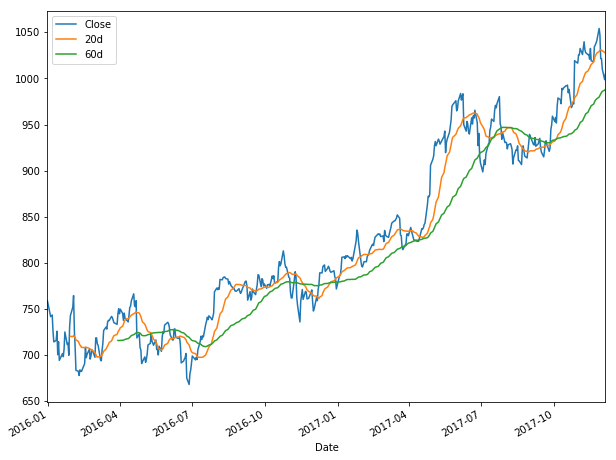

In [5]:
df[['Close', '20d', '60d']].plot(legend='best', figsize=(10,8))

# Q5. 策略回測

In [6]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [7]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [8]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [9]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [10]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [11]:
# 定義你的策略

def 學號_strategy(df):
    has_position = False
    df['signals'] = 0
    
    # TODO
    # 填入你們的策略

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [12]:
def apply_strategy(strategy, df):
    return strategy(df)

In [13]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, 學號_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

In [14]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [15]:
results_df.head()

sharpe  MaxDrawDown  MaxDrawDownDuration   returns  days  entries symbol  \
0  0.131503    -0.208296                  281  0.995734   705       11   TICC   
1  0.395515    -0.244817                  482  1.077756   705        2   TICC   
2  0.102787    -0.231763                  426  0.984521   705       20   TICC   
3  1.365570    -0.361485                  299  1.631388   705       12   TWIN   
4  2.424484    -0.169115                  115  2.151881   705        3   TWIN   

            strategy  
0  Breakout_strategy  
1  RSI_7030_strategy  
2    BBands_strategy  
3  Breakout_strategy  
4  RSI_7030_strategy

In [16]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

sharpe  MaxDrawDown  MaxDrawDownDuration   returns  days  entries  \
55   6.306176    -0.003654                  122  1.028222   473        3   
13  10.243474    -0.006251                    3  1.132402   705        1   
56   2.038551    -0.013673                  119  1.060527   473       16   
50   1.085572    -0.023454                  135  1.049505   384       12   
27   3.040178    -0.023844                   58  1.073352   203        3   

   symbol           strategy  
55    LCA  RSI_7030_strategy  
13   GOOG  RSI_7030_strategy  
56    LCA    BBands_strategy  
50   SCAC    BBands_strategy  
27   CSML  Breakout_strategy

In [17]:
results_df.sort_values('returns',ascending=False).head()

sharpe  MaxDrawDown  MaxDrawDownDuration   returns  days  entries  \
7   2.013777    -0.219296                  167  2.477803   705        4   
11  2.062962    -0.286661                  113  2.422460   705       22   
59  2.136744    -0.454342                  191  2.400221   705       21   
4   2.424484    -0.169115                  115  2.151881   705        3   
68  1.724711    -0.231083                  481  1.717758   704       20   

   symbol           strategy  
7    AMOT  RSI_7030_strategy  
11   CDZI    BBands_strategy  
59   BBGI    BBands_strategy  
4    TWIN  RSI_7030_strategy  
68   ISRL    BBands_strategy